In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
!ls ../../data

creditcard.csv     kc_house_data.csv  telecom_churn.csv
gm_2008_region.csv mnist_digits.csv


In [7]:
credit_df = pd.read_csv('../../data/creditcard.csv')
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
from sklearn.preprocessing import RobustScaler

In [10]:

credit_df['amnt'] = RobustScaler().fit_transform(credit_df['Amount'].values.reshape(-1,1))
credit_df['tm'] = RobustScaler().fit_transform(credit_df['Time'].values.reshape(-1,1))
credit_df.drop(columns=['Amount', 'Time'], inplace=True)

In [11]:
X_all = credit_df.drop(columns=['Class'])
y = credit_df['Class']

y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Visualize, whether we have outliers in columns

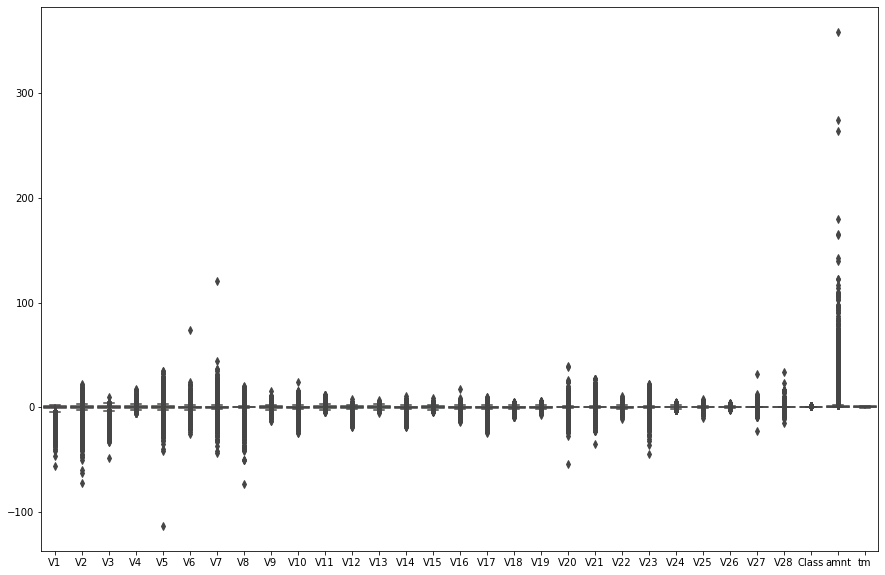

In [12]:
plt.figure(figsize=(15,10))
sns.boxplot(data=credit_df);

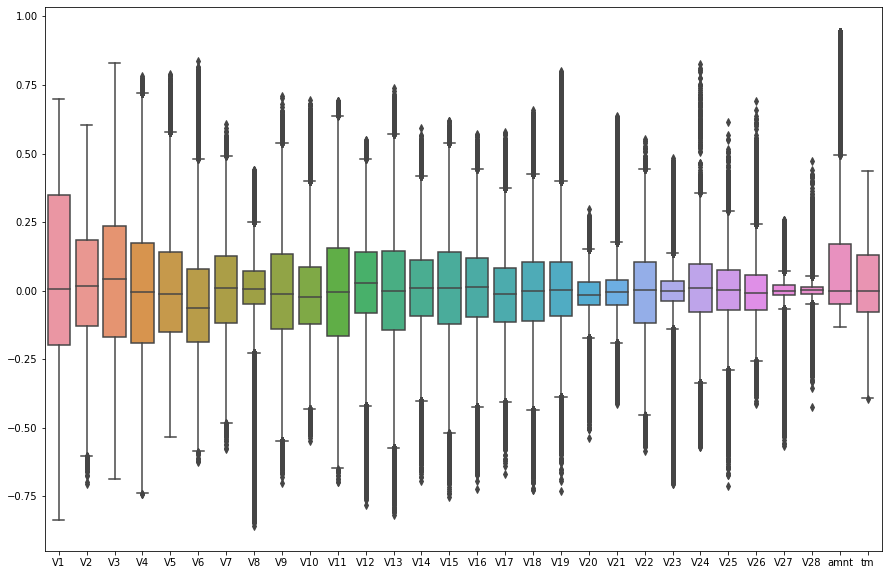

In [13]:
from sklearn.preprocessing import Normalizer, RobustScaler


normalized_df = X_all.copy()
# normalized_df['amnt'] = RobustScaler().fit_transform(normalized_df['Amount'].values.reshape(-1,1))
# normalized_df['tm'] = RobustScaler().fit_transform(normalized_df['Time'].values.reshape(-1,1))
# normalized_df.drop(columns=['Amount', 'Time'], inplace=True)
columns = normalized_df.columns.tolist()

normalized_data = Normalizer().fit_transform(normalized_df)
normalized_df = pd.DataFrame(normalized_data, columns=columns)

plt.figure(figsize=(15,10))
sns.boxplot(data=normalized_df);


In [20]:
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(credit_df)
# scaled_data.shape
scaled_df = pd.DataFrame(scaled_data, columns=credit_df.columns)

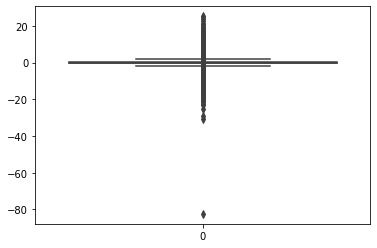

In [21]:
sns.boxplot(data=scaled_df['V5']);

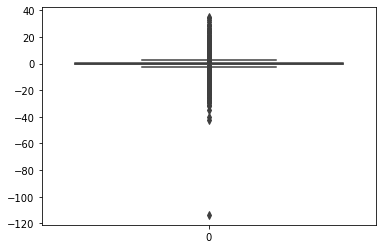

In [16]:
sns.boxplot(data=credit_df['V5']);

## Filter out outliers

Thanks to [link](https://stackoverflow.com/questions/22354094/pythonic-way-of-detecting-outliers-in-one-dimensional-observation-data)

In [22]:
def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return (modified_z_score > thresh).astype(int)

In [23]:
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

In [25]:
outliers_df = pd.DataFrame()
for c in X_all.columns:
    outliers_df[c] = mad_based_outlier(X_all[c])

In [26]:
outliers_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,amnt,tm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
outliers_df.sum(axis=1)

0          1
1          0
2          3
3          0
4          0
          ..
284802    12
284803     0
284804     1
284805     1
284806     1
Length: 284807, dtype: int64

In [28]:
outliers_df.describe().loc['mean']

V1      0.011675
V2      0.029107
V3      0.006506
V4      0.012767
V5      0.019002
V6      0.068699
V7      0.019101
V8      0.061621
V9      0.009182
V10     0.020112
V11     0.001057
V12     0.027141
V13     0.000818
V14     0.022454
V15     0.001443
V16     0.009241
V17     0.012935
V18     0.004694
V19     0.013483
V20     0.072474
V21     0.037583
V22     0.001966
V23     0.044128
V24     0.001345
V25     0.006622
V26     0.004094
V27     0.097185
V28     0.071301
amnt    0.163518
tm      0.000000
Name: mean, dtype: float64

In [29]:
outliers_df_not_amount = outliers_df.drop(columns=['amnt'])

In [33]:
more_than = outliers_df_not_amount.sum(axis=1).map(lambda x: x > 3)
amount = more_than.astype(int).sum(axis=0)

In [34]:
amount / len(X_all)

0.04941943140442475

In [38]:
filtered = y[~more_than]
filtered.value_counts()

0    270651
1        81
Name: Class, dtype: int64

In [40]:
filtered = y[(~more_than) | (y == 1) ]
filtered.value_counts()

0    270651
1       492
Name: Class, dtype: int64

In [41]:
filter_condition = (~more_than) | (y == 1)
df_filtered = credit_df[filter_condition]


In [43]:
df_filtered.to_csv("../../data/credit_filtered.csv", index=False)